# Tidy Data Project


## Step 1: Import Necessary Libraries
Before we begin cleaning and analyzing the dataset, we need to import essential Python libraries:

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load Data Set
The original dataset consists of athlete names along with medal results across different events, separated by gender (e.g., male_archery, female_athletics, etc.). However, there is a lot of sparsity in the dataset (most of the entries contain missing (NaN) values). Sparsity arises because each athlete competes in only 1 event, leaving most columns empty for any given individual. This structure makes analysis and visualization challenging, as the data is spread across multiple columns with very few actual values.

In [161]:
olympics = pd.read_csv("data/olympics_08_medalists.csv")
olympics.head()

,medalist_name,male_archery,female_archery,male_athletics,female_athletics,male_badminton,female_badminton,male_baseball,male_basketball,female_basketball,...,female_beach volleyball,male_volleyball,female_volleyball,male_water polo,female_water polo,male_weightlifting,female_weightlifting,male_freestyle wrestling,female_freestyle wrestling,male_greco-roman wrestling
0,Aaron Armstrong,NaN,NaN,gold,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aaron Peirsol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abdullo Tangriev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abeer Abdelrahman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,bronze,NaN,NaN,NaN
4,Abhinav,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## Step 3: Melting the Data
 To address the sparsity, the data must be converted from a wide format to a long format using the pd.melt() function. Instead of having separate columns for each event and gender, we transformed the data so each row represents an athlete, their gender, a specific event, and the medal they won. This restructuring reduces the number of empty cells, making it easier to analyze trends, count medals, and filter by event or gender. 

In [162]:
olympics_melted = pd.melt(olympics, id_vars=['medalist_name'],
                             value_vars=[col for col in olympics.columns if col != 'medalist_name'],
                             var_name='gender_event', value_name='Medal')
olympics_melted = olympics_melted.sort_values(by=['medalist_name'], ascending=True)
olympics_melted.head()

,medalist_name,gender_event,Medal
0,Aaron Armstrong,male_archery,NaN
71250,Aaron Armstrong,female_judo,NaN
123750,Aaron Armstrong,female_weightlifting,NaN
73125,Aaron Armstrong,male_modern pentathlon,NaN
30000,Aaron Armstrong,male_mountain biking,NaN


## Step 4: Clean Dataset
Even after restructuring the dataset, we still have many NaN values. This is because, initially, each row represented an athlete with multiple event columns, many of which they did not compete in. The data is refiend by separating the gender_event column into distinct gender and event columns.Additionally, we filter out rows where Medal is NaN, not because we are filtering out non-medalists (since everyone in the dataset won a medal), but to remove cases where an athlete simply did not compete in a particular event.

In [163]:
# Step 1:  Separate gender end event columns which where together after melting process
olympics_melted[['gender', 'event']] = olympics_melted['gender_event'].str.split('_', expand=True)
olympics_melted.drop(columns=['gender_event'])

# Step 2: Re-order columns and Drop NaN
olympics_tidy = olympics_melted[['medalist_name','gender','event','Medal']]
olympics_tidy = olympics_tidy.dropna(subset=['Medal'])

#Step 3: Orgnize alphabeticaly by Medalist name
olympics_tidy = olympics_tidy.sort_values(by=['medalist_name'], ascending=True)

#Step 4: Preview Data
olympics_tidy.head()

,medalist_name,gender,event,Medal
3750,Aaron Armstrong,male,athletics,gold
90001,Aaron Peirsol,male,swimming,gold
69377,Abdullo Tangriev,male,judo,silver
123753,Abeer Abdelrahman,female,weightlifting,bronze
84379,Abhinav,male,shooting sport,gold


## Step 5: Investigate the Data
Before creating visualizations, exploring and summarizing the data is useful. This step helps will help understand the structure of the data and identify possible visualizations. Some of the statistics that will be examined include: amount of medalists by gender, number of events and medal breakdown.

In [164]:
#Generate sumamry statistics of the data
olympics_tidy.describe()

,medalist_name,gender,event,Medal
count,1875,1875,1875,1875
unique,1875,2,38,3
top,Aaron Armstrong,male,athletics,bronze
freq,1,1032,166,668


In [165]:
#Number of Medalists and gender
medalists = olympics_tidy['Medal'].shape[0]
female = (olympics_tidy['gender'] == 'female').sum()
male = (olympics_tidy['gender'] == 'male').sum()
print(f'There are {medalists} Medalist in the Data Set, {female} females and {male} males.')

#Number of Events
Events = olympics_tidy['event'].nunique()
print(f'There where {Events} differnet sports in the 2008 Olympic Games')

#Medal Count
gold_count = (olympics_tidy['Medal'] == 'gold').sum()
silver_count = (olympics_tidy['Medal'] == 'silver').sum()
bronze_count = (olympics_tidy['Medal'] == 'bronze').sum()

print(f"Medal Breakdown: Gold: {gold_count}, Silver: {silver_count}, Bronze: {bronze_count}")

There are 1875 Medalist in the Data Set, 843 females and 1032 males.
There where 38 differnet sports in the 2008 Olympic Games
Medal Breakdown: Gold: 586, Silver: 621, Bronze: 668


## Step 6: Visualize the Data

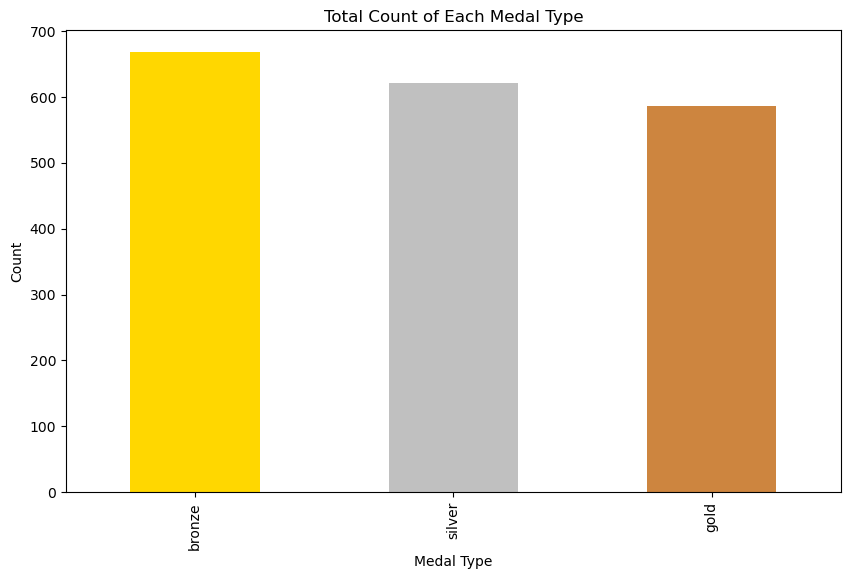

In [168]:
# Count the number of each medal type
medal_counts = olympics_tidy['Medal'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
medal_counts.plot(kind="bar", color=["gold", "silver", "peru"])

# Labels and title
plt.xlabel("Medal Type")
plt.ylabel("Count")
plt.title("Total Count of Each Medal Type")

# Show the plot
plt.show()

This bar chart displays the total count of each Olympic medal type (bronze, silver, and gold). Evidently, bronze medals are the most awarded, followed by silver, and then gold. This pattern likely occurs because ties are more common for third place than for first, leading to multiple bronze medals being awarded in some events.

/var/folders/8j/wsbxsgjj7rq076lxls5153nh0000gn/T/ipykernel_10183/4089288788.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_medal_counts = olympics_tidy.groupby(['event', 'Medal']).size().unstack().sort_values(by=['gold', 'silver', 'bronze'], ascending=False)


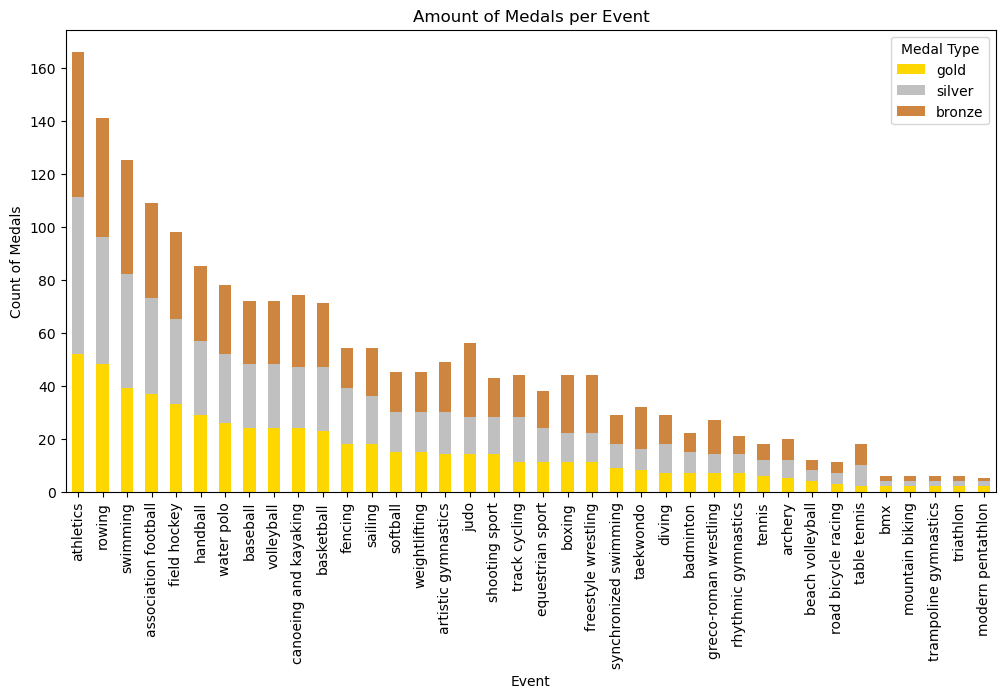

In [167]:
# Convert Medal column to an ordered categorical type
olympics_tidy['Medal'] = pd.Categorical(olympics_tidy['Medal'], 
                                        categories=['gold', 'silver', 'bronze'], 
                                        ordered=True)

# Group by event and medal type, then count occurrences using .size() 
event_medal_counts = olympics_tidy.groupby(['event', 'Medal']).size().unstack().sort_values(by=['gold', 'silver', 'bronze'], ascending=False)

# Plot a stacked bar chart for the number of medals in each event
event_medal_counts.plot(kind="bar", stacked=True, figsize=(12, 6), color=["gold", "silver", "peru"])

# Labels and title
plt.xlabel("Event")
plt.ylabel("Count of Medals")
plt.title("Amount of Medals per Event")
plt.legend(title="Medal Type")

# Show the plot
plt.show()

The graph above shows the total medalists in different Olympic events, with the events featuring the most medalists generally being team sports or sports that have mutiple categories, while those with fewer medalists tend to be more niche individual events. Despite differences in the total number of medalists, the proportion of gold, silver, and bronze medals remains relatively consistent across events.

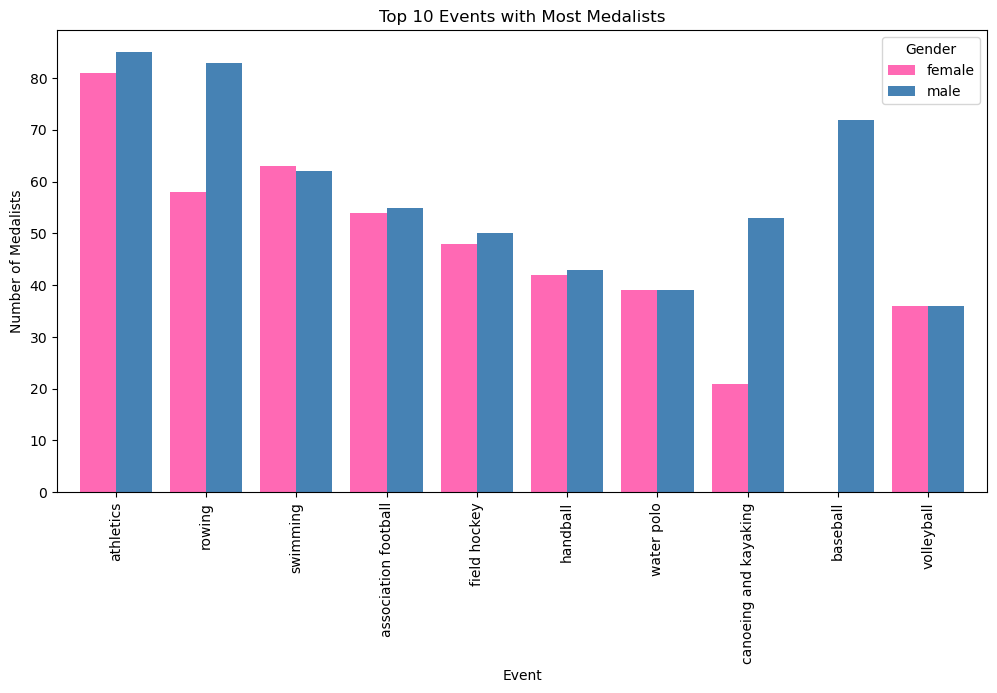

In [142]:
# Group by event and gender, then count
event_gender_counts = olympics_tidy.groupby(['event', 'gender']).size().unstack()

# Create Filter for top 10 events with most medalists
# sum(axis=1) used to sum up males and female counts per event
top_medalists_events = event_gender_counts.sum(axis=1).sort_values(ascending=False).head(10)

# Select only the top 10 events from the original DataFrame
top_10_gender_counts = event_gender_counts.loc[top_10_gender_counts.index]

# Plot side-by-side bar chart
top_10_gender_counts.plot(kind='bar', figsize=(12,6), width=0.8, color =['hotpink','steelblue'] )

# Labels and title
plt.xlabel("Event")
plt.ylabel("Number of Medalists")
plt.title("Top 10 Events with Most Medalists")
plt.xticks(rotation=90)
plt.legend(title="Gender")

# Show the plot
plt.show()

The previous graph showed the events with the most medalists, but it would be interesting to understand the main drivers behind this distribution, particuarly if gender plays a role. This chart breaks down the top 10 sports with the most medalists by gender. With the exception of swimming, all sports have more male medalists. This suggests that male participation has historically been higher in these events (and until 2008 was mantained), possibly due to structural factors such as earlier inclusion in the Olympics or differences in the number of categories available for men and women in certain disciplines. This trend can be further confirmed by seeing the gender breakdown for medalists in the 2008 summer olympics.

Text(0.5, 1.0, 'Medalists Gender Breakdown')

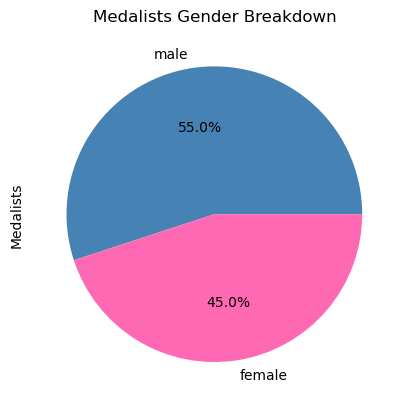

In [147]:
#Create pie cahrt showing medalist gender breakdown
gender_count = olympics_tidy['gender'].value_counts()
plot = gender_count.plot.pie(y='gender',
                             autopct='%1.1f%%',
                             colors =['steelblue','hotpink'])

plt.ylabel("Medalists")
plt.title("Medalists Gender Breakdown")

The pie chart reinforces the trend observed in the bar graph, showing that male medalists slightly outnumber female medalists in the 2008 Summer Olympics (55% vs 45% ). This aligns with historical participation disparities, as women's events were introduced later and often had fewer categories compared to men's.

## Step 5: Pivot Table

In [152]:
#Gender and event as index, medals as values
pivot_table_= pd.pivot_table(olympics_tidy, values='Medal',
                                    index=['gender','event'], columns='Medal', aggfunc='count')
print(pivot_table_medal)

#Gender and event as index, medals as values
pivot_table_gender= pd.pivot_table(olympics_tidy, values='gender',
                                    index='event', columns='Medal', aggfunc='count')
print(pivot_table_gender)

Medal                         bronze  gold  silver
gender event                                      
female archery                   4.0   2.0     3.0
       artistic gymnastics       7.0   7.0     6.0
       association football     18.0  18.0    18.0
       athletics                26.0  27.0    28.0
       badminton                 3.0   3.0     4.0
...                              ...   ...     ...
male   trampoline gymnastics     1.0   1.0     1.0
       triathlon                 1.0   1.0     1.0
       volleyball               12.0  12.0    12.0
       water polo               13.0  13.0    13.0
       weightlifting             8.0   8.0     8.0

[70 rows x 3 columns]
Medal                  gold  silver  bronze
event                                      
archery                   5       7       8
artistic gymnastics      14      16      19
association football     37      36      36
athletics                52      59      55
badminton                 7       8       7
baseba

/var/folders/8j/wsbxsgjj7rq076lxls5153nh0000gn/T/ipykernel_10183/2415064134.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_= pd.pivot_table(olympics_tidy, values='Medal',
/var/folders/8j/wsbxsgjj7rq076lxls5153nh0000gn/T/ipykernel_10183/2415064134.py:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_gender= pd.pivot_table(olympics_tidy, values='gender',


In [187]:
#Gender and event as index, medals as values
pivot_table_gender= pd.pivot_table(olympics_tidy, values='event',
                                    index='gender', columns='Medal', aggfunc='count')

# Convert to percentages by summing medals across columns (axis=1) to get total medals per gender,  
# then divide each medal count by its gender's total (axis=0) to normalize rows to 100%
pivot_table_gender = round((pivot_table_gender.div(pivot_table_gender.sum(axis=1), axis=0)) * 100,1)

# Display the table
print(pivot_table_gender)

Medal   gold  silver  bronze
gender                      
female  32.1    33.0    34.9
male    30.5    33.2    36.2


/var/folders/8j/wsbxsgjj7rq076lxls5153nh0000gn/T/ipykernel_10183/2299723119.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table_gender= pd.pivot_table(olympics_tidy, values='event',
